In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams["figure.figsize"] = (10,4)
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [5]:
df["Drug"].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [6]:
df["Sex"].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [7]:
df["BP"].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [8]:
df["Cholesterol"].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [9]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# What is skewness?
Skewness, in statistics, is the degree of asymmetry observed in a probability distribution. Distributions can exhibit right (positive) skewness or left (negative) skewness to varying degrees. A normal distribution (bell curve) exhibits zero skewness.

In [10]:
skewAge = df["Age"].skew(axis=0, skipna=True)
skewAge

0.03030835703000607

In [11]:
skewNatoK = df["Na_to_K"].skew(axis=0, skipna=True)
skewNatoK

1.039341186028881

c:\users\younu\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


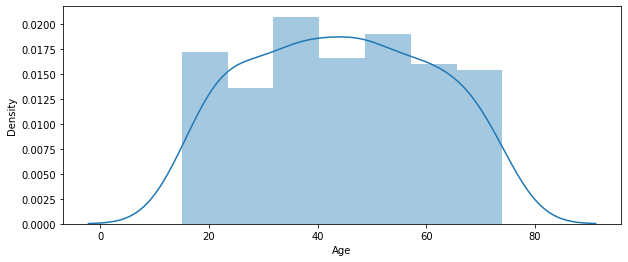

In [12]:
sns.distplot(df["Age"])
plt.show()

__Age has a normal distribution (bell curve) exhibits zero skewness.__

c:\users\younu\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


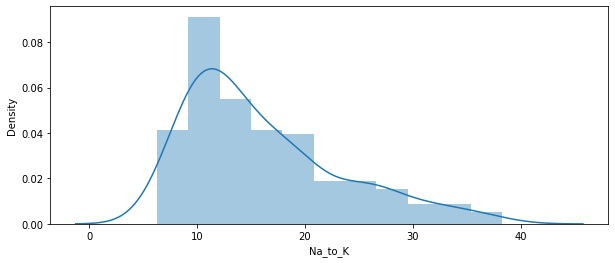

In [13]:
sns.distplot(df["Na_to_K"])
plt.show()

__Na_to_K exhibits right (positive) skewness.__


1. The distribution of 'Age' column is symetric, since the skewness value between -0.5 and 0.5
2. The distribution of 'Na_to_K' column is moderately skewed, since the skewness value is between 0.5 and 1. It can also be seen from the histogram for 'Na_to_K' column



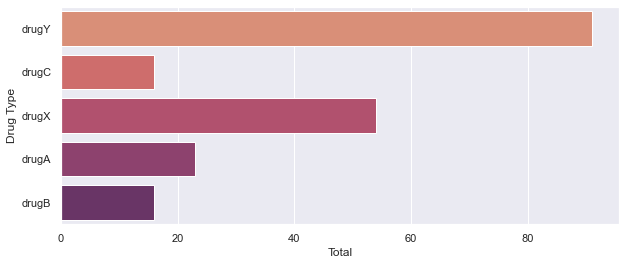

In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug",data=df,palette="flare")
plt.ylabel("Drug Type")
plt.xlabel("Total")
plt.show()

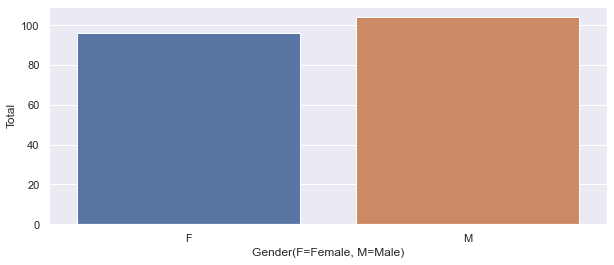

In [15]:
sns.countplot(x="Sex", data=df)
plt.xlabel("Gender(F=Female, M=Male)")
plt.ylabel("Total")
plt.show()

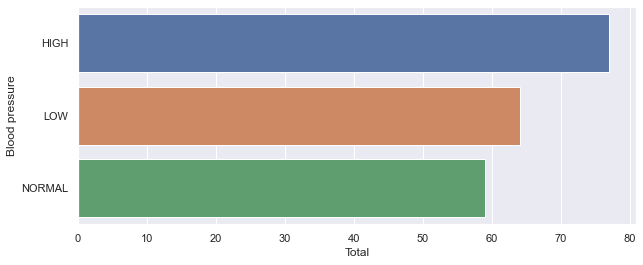

In [16]:
sns.countplot(y="BP", data=df)
plt.ylabel("Blood pressure")
plt.xlabel("Total")
plt.show()

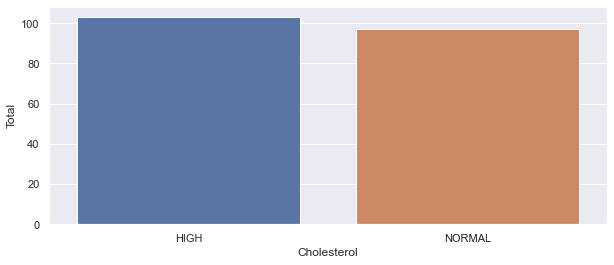

In [17]:
sns.countplot(x="Cholesterol", data=df)
plt.xlabel("Cholesterol")
plt.ylabel("Total")
plt.show()

In [18]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

### Gender Distribution based on Drug Type

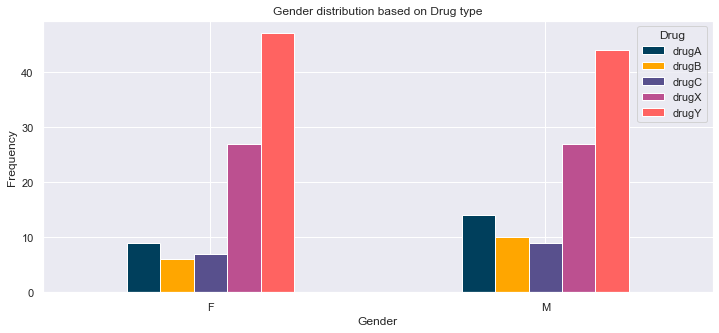

In [19]:
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",
                                           figsize=(12,5),
                                           color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

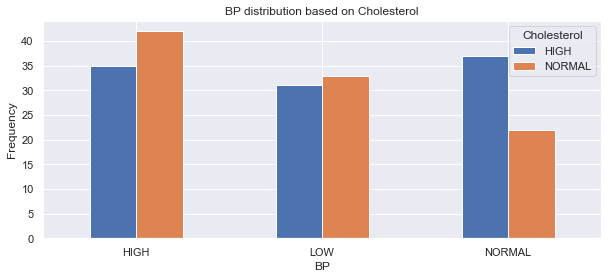

In [20]:
pd.crosstab(df.BP, df.Cholesterol).plot(kind="bar")
plt.title('BP distribution based on Cholesterol')
plt.xlabel('BP')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### Sodium to Potassium Distribution based on Gender and Age

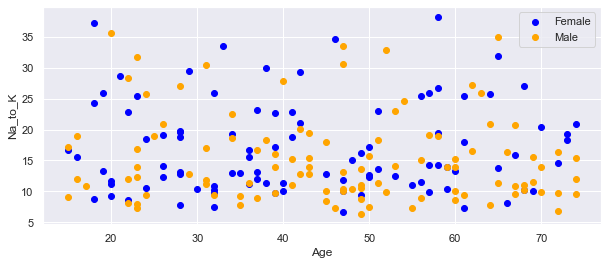

In [21]:
plt.scatter(x=df.Age[(df.Sex=='F')], y=df.Na_to_K[(df.Sex=='F')], c="Blue")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

## Dataset Preparation

#### <a href="https://docs.tibco.com/pub/spotfire/7.0.1/doc/html/bin/bin_what_is_binning.htm">What does binning mean in data?</a>
Binning is a way to group a number of more or less continuous values into a smaller number of "bins". For example, if you have data about a group of people, you might want to arrange their ages into a smaller number of age intervals.
##### <a href="https://www.i2tutorials.com/what-do-you-mean-by-binning-in-machine-learning-what-are-the-differences-between-fixed-width-binning-and-adoptive-binning/#:~:text=Binning%20improves%20accuracy%20of%20the,Learning%20to%20handle%20continuous%20variables"> What is data binning ? What are the types? How it's important </a>
Binning improves accuracy of the predictive models by reducing the noise or non-linearity in the dataset. Finally, binning lets easy identification of outliers, invalid and missing values of numerical variables. Binning is a quantization technique in Machine Learning to handle continuous variables.



### Data Binning 
__cut():__ Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins. <br>
https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [22]:
bin_age = [0,19,29,39,49,59,69,80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'],bins=bin_age,labels=category_age)
df = df.drop(['Age'],axis=1)
df.head()

,Sex,BP,Cholesterol,Na_to_K,Drug,Age_binned
0,F,HIGH,HIGH,25.355,drugY,20s
1,M,LOW,HIGH,13.093,drugC,40s
2,M,LOW,HIGH,10.114,drugC,40s
3,F,NORMAL,HIGH,7.798,drugX,20s
4,F,LOW,HIGH,18.043,drugY,60s


In [23]:
df["Age_binned"].value_counts()

40s     38
30s     37
20s     35
50s     33
60s     32
>60s    13
<20s    12
Name: Age_binned, dtype: int64

In [24]:
df.describe()

,Na_to_K
count,200.000000
mean,16.084485
std,7.223956
min,6.269000
25%,10.445500
50%,13.936500
75%,19.380000
max,38.247000


In [25]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)
df.head()

,Sex,BP,Cholesterol,Drug,Age_binned,Na_to_K_binned
0,F,HIGH,HIGH,drugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,<10
4,F,LOW,HIGH,drugY,60s,10-20


##  Splitting the dataset 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Feature Engineering 

In [29]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [30]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [31]:
# df.iloc[131,1:2]

### SMOTE: Synthetic Minority Oversampling Technique
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/ <br>
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together

__Since the number of 'DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting.__

In [32]:
# pip install imblearn

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

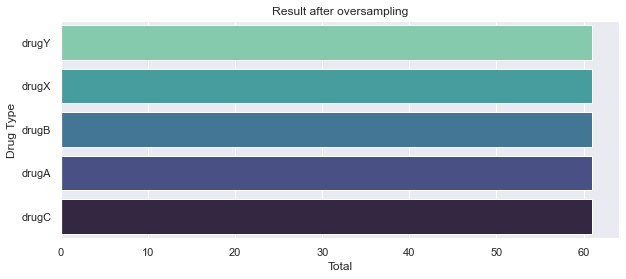

In [35]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="mako_r")
plt.title("Result after oversampling")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

## LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
"""solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes."""
LRclassifier.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

In [37]:
y_pred = LRclassifier.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.79      0.83      0.81        18
       drugY       0.88      0.70      0.78        30

    accuracy                           0.80        60
   macro avg       0.76      0.91      0.82        60
weighted avg       0.82      0.80      0.80        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 15  3]
 [ 2  1  2  4 21]]


In [39]:
from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 80.00%


## K Neighbours

In [40]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       drugA       0.36      1.00      0.53         5
       drugB       1.00      0.33      0.50         3
       drugC       0.57      1.00      0.73         4
       drugX       0.80      0.89      0.84        18
       drugY       0.89      0.53      0.67        30

    accuracy                           0.70        60
   macro avg       0.72      0.75      0.65        60
weighted avg       0.80      0.70      0.70        60

[[ 5  0  0  0  0]
 [ 1  1  0  0  1]
 [ 0  0  4  0  0]
 [ 1  0  0 16  1]
 [ 7  0  3  4 16]]
K Neighbours accuracy is: 70.00%


## SVM

In [41]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       drugA       0.60      0.60      0.60         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       0.91      0.70      0.79        30

    accuracy                           0.82        60
   macro avg       0.75      0.86      0.79        60
weighted avg       0.83      0.82      0.81        60

[[ 3  0  0  0  2]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 2  1  2  4 21]]
SVC accuracy is: 81.67%


c:\users\younu\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       drugA       0.50      1.00      0.67         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.60      0.75        30

    accuracy                           0.80        60
   macro avg       0.75      0.92      0.79        60
weighted avg       0.87      0.80      0.80        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 5  1  2  4 18]]
Decision Tree accuracy is: 80.00%


## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       drugA       0.57      0.80      0.67         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       0.95      0.67      0.78        30

    accuracy                           0.82        60
   macro avg       0.75      0.89      0.80        60
weighted avg       0.85      0.82      0.81        60

[[ 4  0  0  0  1]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 3  1  2  4 20]]
Random Forest accuracy is: 81.67%


# Model Comparison

In [44]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Decision Tree', 'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100,  SVCAcc*100, DTAcc*100,  RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,SVM,81.666667
4,Random Forest,81.666667
0,Logistic Regression,80.000000
3,Decision Tree,80.000000
1,K Neighbors,70.000000
